# SVM (linear)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from yellowbrick.contrib.classifier import DecisionViz

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
### Datasets:

df = pd.read_csv('../occupancy_data/training_preprocessed.csv')
df_test = pd.read_csv('../occupancy_data/test_preprocessed.csv')

df = df.drop('Unnamed: 0', 1)
df_test = df_test.drop('Unnamed: 0', 1)

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
#standardising the data:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Linear SVM

In [5]:
from sklearn.svm import LinearSVC

In [30]:
parameters = { 
               'C': np.arange(1, 1000, 10)
             }

In [31]:
svm_1 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 3)

In [32]:
svm_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [33]:
svm_1.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [34]:
svm_1.fit(X_train_scaled, y_train)
y_pred = svm_1.predict(X_test_scaled)

In [35]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9917033525228581
F1-score [0.99465707 0.98144642]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [36]:
svm_2 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [37]:
svm_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [38]:
svm_2.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [39]:
svm_2.fit(X_train_scaled, y_train)
y_pred = svm_2.predict(X_test_scaled)

In [40]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9917033525228581
F1-score [0.99465707 0.98144642]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [41]:
svm_3 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 10)

In [42]:
svm_3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 18...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [43]:
svm_3.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [44]:
svm_3.fit(X_train_scaled, y_train)
y_pred = svm_3.predict(X_test_scaled)

In [45]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9917033525228581
F1-score [0.99465707 0.98144642]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [46]:
svm_4 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 20)

In [47]:
svm_4.fit(X_train_scaled, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 18...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [48]:
svm_4.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [49]:
svm_4.fit(X_train_scaled, y_train)
y_pred = svm_4.predict(X_test_scaled)

In [50]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9917033525228581
F1-score [0.99465707 0.98144642]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



## Linear SVM on PCA'd dataset

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(2)

In [16]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [17]:
X_test_pca = pca.transform(X_test_scaled)

In [10]:
X_test_pca

array([[ 3.35315812, -1.22072275],
       [ 3.33374889, -1.237873  ],
       [ 3.25960377, -1.24225344],
       ...,
       [ 3.07200402,  0.36112278],
       [ 3.18172561,  0.48366931],
       [ 3.31571882,  0.67921576]])

In [98]:
svm = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [99]:
svm.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [100]:
svm.best_estimator_

LinearSVC(C=11, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [101]:
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

In [102]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9559769725702675
F1-score [0.97189797 0.8984375 ]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.94      5906
weighted avg       0.96      0.96      0.96      5906



In [103]:
decision_function = svm.decision_function(X_train_pca)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_pca[support_vector_indices]

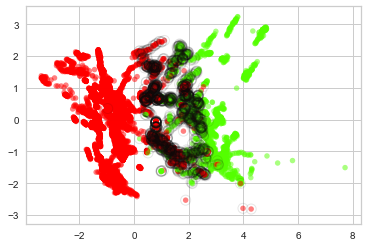

In [108]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.5, s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [18]:
svm = LinearSVC(C=21, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


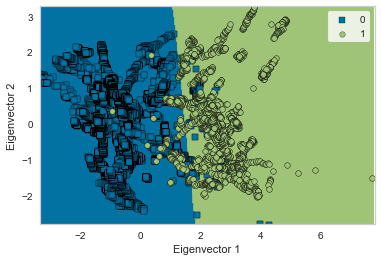

In [19]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_train_pca, y_train)
viz.show()

In [63]:
svm = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 20)

In [64]:
svm.fit(X_train_pca, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 18...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [65]:
svm.best_estimator_

LinearSVC(C=21, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [66]:
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

In [67]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9559769725702675
F1-score [0.97189797 0.8984375 ]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.94      5906
weighted avg       0.96      0.96      0.96      5906



In [96]:
decision_function = svm.decision_function(X_train_pca)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_pca[support_vector_indices]

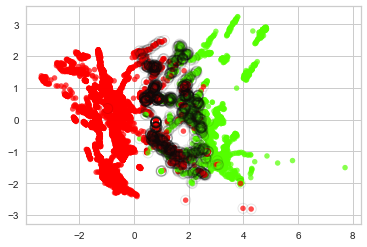

In [97]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [20]:
svm = LinearSVC(C=21, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


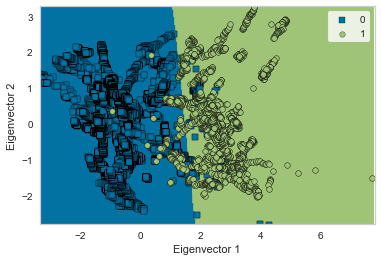

In [21]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_train_pca, y_train)
viz.show()

Support vectors of previous SVM classifiers:

In [93]:
decision_function = svm_1.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [94]:
support_vectors_pca = pca.transform(support_vectors)

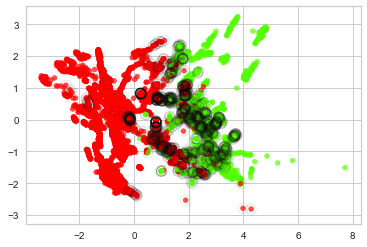

In [95]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [90]:
decision_function = svm_2.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [91]:
support_vectors_pca = pca.transform(support_vectors)

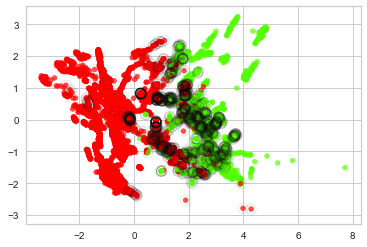

In [92]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [87]:
decision_function = svm_3.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [88]:
support_vectors_pca = pca.transform(support_vectors)

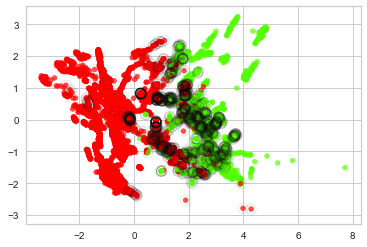

In [89]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [80]:
decision_function = svm_4.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [81]:
support_vectors_pca = pca.transform(support_vectors)

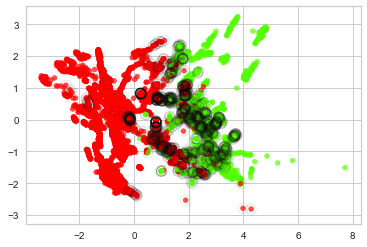

In [86]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

## Linear SVM on dataset with 2 of the original dimensions

The two dimensions have been selected that resulted the most important in dt classification: DeltaLight and DeltaHumidity

In [6]:
df = df[['Delta Light','Delta Humidity','Occupancy']]
df_test = df_test[['Delta Light','Delta Humidity','Occupancy']]

In [7]:
# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [112]:
from sklearn.svm import LinearSVC

In [113]:
parameters = { 
               'C': np.arange(1, 1000, 10)
             }

In [114]:
svm_dt = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [115]:
svm_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])},
       

In [18]:
svm_dt.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [19]:
y_pred = svm_dt.predict(X_test_scaled)

In [20]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9869624111073485
F1-score [0.99162042 0.9706443 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.96      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.98      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [116]:
decision_function = svm_dt.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

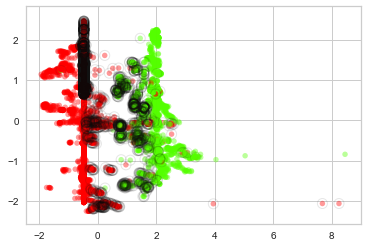

In [117]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.1)
plt.show()

In [9]:
svm_dt = LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

PER MARTA: GRAFICO QUA SOTTO

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


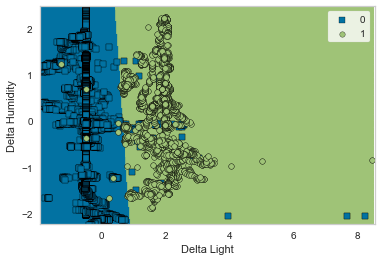

In [10]:
viz = DecisionViz(
    svm_dt,
    features=['Delta Light', 'Delta Humidity']
)
viz.fit(X_train_scaled, y_train)
viz.draw(X_train_scaled, y_train)
viz.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


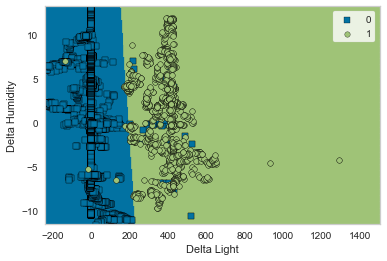

In [44]:
viz = DecisionViz(
    svm_dt,
    features=['Delta Light', 'Delta Humidity']
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()